## Importing Packages

In [1]:
import pandas as pd
import missingno as msno
import matplotlib as plt

In [2]:
# link to import data
data_url="https://www.berlin.de/sen/uvk/_assets/verkehr/infrastruktur/oeffentliche-toiletten/berliner-toiletten-standorte.xlsx"

## Importing data from source


In [3]:
data = pd.read_excel(data_url)

## Viewing data

In [4]:
data.head()

,Stand:27.04.2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",NaN,14109,Deutschland,"13,240574813","52,453581173",1,0,"0,00",0,0,0,0,5,0,269
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",NaN,14129,Deutschland,"13,1992287644287","52,4365068880875",1,0,"0,00",0,0,0,0,5,0,NaN


## Fixing data structure

In [5]:
# Making row 2 the column headings
data.columns = data.iloc[2]

In [6]:
data.head()

2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,Price,canBePayedWithCoins,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",NaN,14109,Deutschland,"13,240574813","52,453581173",1,0,"0,00",0,0,0,0,5,0,269
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",NaN,14129,Deutschland,"13,1992287644287","52,4365068880875",1,0,"0,00",0,0,0,0,5,0,NaN


In [7]:
# dropping redundant rows
data.drop([0,1,2],inplace=True)

## Exploring data

In [8]:
data.shape

(440, 19)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 3 to 442
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   LavatoryID               440 non-null    object
 1   Description              440 non-null    object
 2   City                     440 non-null    object
 3   Street                   440 non-null    object
 4   Number                   0 non-null      object
 5   PostalCode               440 non-null    object
 6   Country                  440 non-null    object
 7   Longitude                440 non-null    object
 8   Latitude                 440 non-null    object
 9   isOwnedByWall            440 non-null    object
 10  isHandicappedAccessible  440 non-null    object
 11  Price                    440 non-null    object
 12  canBePayedWithCoins      440 non-null    object
 13  canBePayedInApp          440 non-null    object
 14  canBePayedWithNFC        440 non-null    o

## Exploring missing data

In [10]:
data.isnull().sum()

2
LavatoryID                   0
Description                  0
City                         0
Street                       0
Number                     440
PostalCode                   0
Country                      0
Longitude                    0
Latitude                     0
isOwnedByWall                0
isHandicappedAccessible      0
Price                        0
canBePayedWithCoins          0
canBePayedInApp              0
canBePayedWithNFC            0
hasChangingTable             0
LabelID                      0
hasUrinal                    0
FID                         91
dtype: int64

<AxesSubplot:>

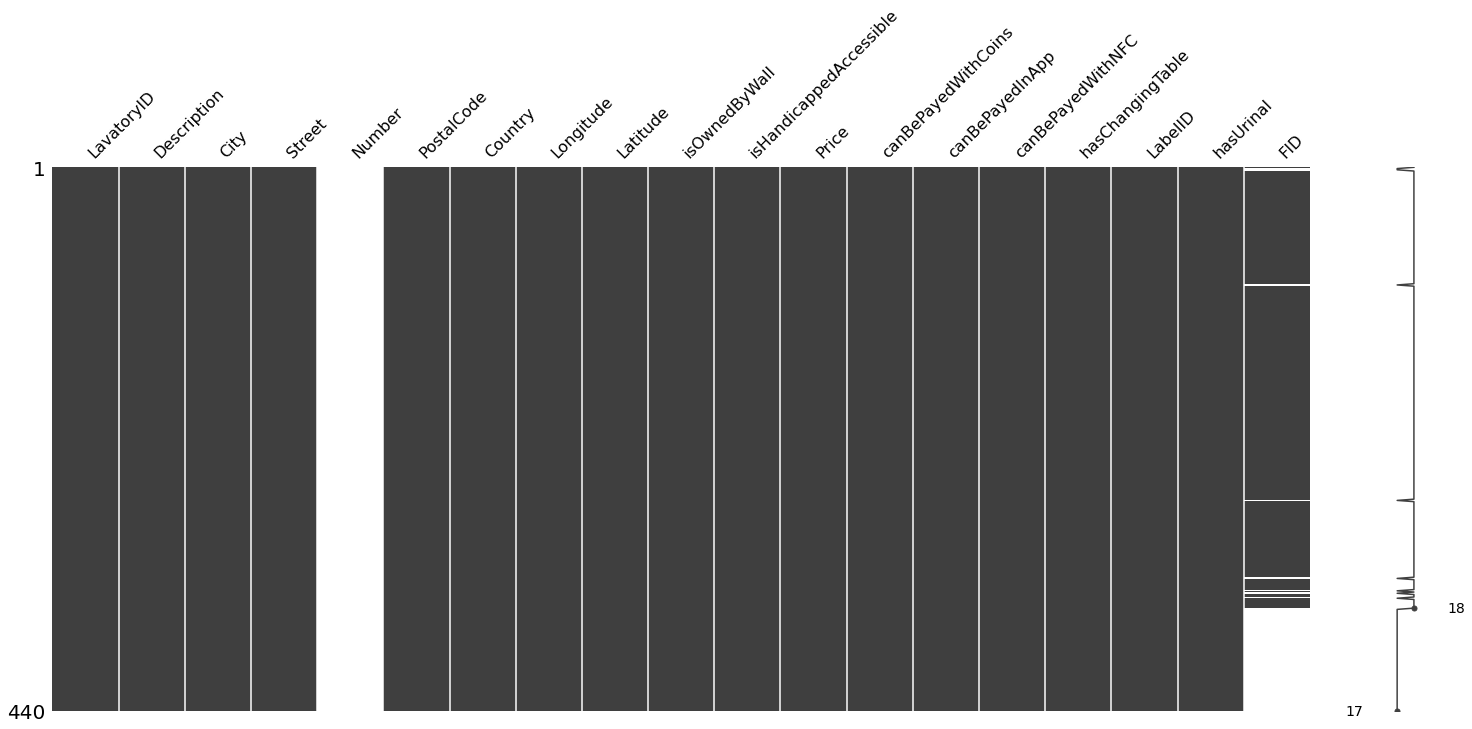

In [11]:
msno.matrix(data)

##### Since FID is an external identification number and does not affect our app we leave the missing numbers
##### Number Column is the House number/Location, since all the values are missing and the location can also be detected using the lattitude and longitude columns we will leave the missing values as they are 

## Extracting opening hours and address from Street column

In [12]:
data[['address','timings']]=data['Street'].str.split('(',n=1,expand=True)
data['timings']=data['timings'].str.extract('([0-9]+-[0-9]+)')
data[['opening_hour','closing_hour']]=data['timings'].str.split("-",n=1,expand=True)
data['opening_hours']=data['opening_hour']+str(':00')+str('-')+data['closing_hour']+str(':00')

In [13]:
data.head()

2,LavatoryID,Description,City,Street,Number,PostalCode,Country,Longitude,Latitude,isOwnedByWall,...,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,FID,address,timings,opening_hour,closing_hour,opening_hours
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",NaN,14109,Deutschland,"13,240574813","52,453581173",1,...,0,0,5,0,269,"Krumme Lanke, Quermatenweg",0-24,0,24,0:00-24:00
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",NaN,14129,Deutschland,"13,1992287644287","52,4365068880875",1,...,0,0,5,0,NaN,"Schlachtensee , Am Schlachtensee ggü. 145",0-24,0,24,0:00-24:00
5,Wall_115753,Toilette Am Kiesteich 50,Berlin,Spektepark (0-24 Uhr),NaN,13589,Deutschland,"13,1648593254089","52,5488398803196",1,...,0,0,5,0,NaN,Spektepark,0-24,0,24,0:00-24:00
6,Wall_116738,"Wall CT, Hubertusdamm",Berlin,Hubertusdamm ggü. 7 (0-24 Uhr),NaN,13125,Deutschland,"13,4711982596938","52,615670613826",1,...,1,1,1,1,868,Hubertusdamm ggü. 7,0-24,0,24,0:00-24:00
7,Wall_116739,"Wall CT, Lindenufer",Berlin,Lindenufer ggü. 10 (0-24 Uhr),NaN,13597,Deutschland,"13,2077640060379","52,537351114776",1,...,1,1,1,0,738,Lindenufer ggü. 10,0-24,0,24,0:00-24:00


In [14]:
# Deleting Number column as it add no value
data.drop('Number', axis=1, inplace=True)
data.drop('FID', axis=1, inplace=True)

In [15]:
#Replacing values to make more sense
data["isOwnedByWall"] = data["isOwnedByWall"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["isHandicappedAccessible"] = data["isHandicappedAccessible"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["canBePayedWithCoins"] = data["canBePayedWithCoins"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["canBePayedInApp"] = data["canBePayedInApp"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["canBePayedWithNFC"] = data["canBePayedWithNFC"].replace(to_replace=[1, 0], value=["Yes", "No"])
data["hasChangingTable"] = data["hasChangingTable"].replace(to_replace=[1, 0], value=["Yes", "No/Unknown"])
data["hasUrinal"] = data["hasUrinal"].replace(to_replace=[1, 0], value=["Yes", "No"])

In [16]:
data["LabelID"] = data["LabelID"].replace(to_replace=[1, 2,3,4,5,6], value=["Berliner Toilette", "City Toilette","WC-Center","Café Achteck","weitere ÖTs (z.B. Sanitärcontainer)","Toilette nicht von Wall"])

In [17]:
data.head()

2,LavatoryID,Description,City,Street,PostalCode,Country,Longitude,Latitude,isOwnedByWall,isHandicappedAccessible,...,canBePayedInApp,canBePayedWithNFC,hasChangingTable,LabelID,hasUrinal,address,timings,opening_hour,closing_hour,opening_hours
3,Wall_101003,Toilette Ottmachauer Steig (oberhalb Badestell...,Berlin,"Krumme Lanke, Quermatenweg (0-24 Uhr)",14109,Deutschland,"13,240574813","52,453581173",Yes,No,...,No,No,No/Unknown,weitere ÖTs (z.B. Sanitärcontainer),No,"Krumme Lanke, Quermatenweg",0-24,0,24,0:00-24:00
4,Wall_112911,Toilette Uferweg,Berlin,"Schlachtensee , Am Schlachtensee ggü. 145 (0-...",14129,Deutschland,"13,1992287644287","52,4365068880875",Yes,No,...,No,No,No/Unknown,weitere ÖTs (z.B. Sanitärcontainer),No,"Schlachtensee , Am Schlachtensee ggü. 145",0-24,0,24,0:00-24:00
5,Wall_115753,Toilette Am Kiesteich 50,Berlin,Spektepark (0-24 Uhr),13589,Deutschland,"13,1648593254089","52,5488398803196",Yes,No,...,No,No,No/Unknown,weitere ÖTs (z.B. Sanitärcontainer),No,Spektepark,0-24,0,24,0:00-24:00
6,Wall_116738,"Wall CT, Hubertusdamm",Berlin,Hubertusdamm ggü. 7 (0-24 Uhr),13125,Deutschland,"13,4711982596938","52,615670613826",Yes,Yes,...,Yes,Yes,Yes,Berliner Toilette,Yes,Hubertusdamm ggü. 7,0-24,0,24,0:00-24:00
7,Wall_116739,"Wall CT, Lindenufer",Berlin,Lindenufer ggü. 10 (0-24 Uhr),13597,Deutschland,"13,2077640060379","52,537351114776",Yes,Yes,...,Yes,Yes,Yes,Berliner Toilette,No,Lindenufer ggü. 10,0-24,0,24,0:00-24:00


In [19]:
data.to_csv('C:/Users/Rashmi Dsouza/Desktop/TechLabs/Project/Data/draft_peedom.csv')